# Homework 3

Troy Austin, Mark Moreno, Muskaan Singhania

Setup

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from matplotlib.pyplot import *

### Question 1

In [61]:
gold = pd.read_csv('/Users/muskaansinghania/Downloads/gold.txt', sep='\t', \
                   header=None, names=['url', 'category']) # Separating gold.txt
labels = pd.read_csv('/Users/muskaansinghania/Downloads/labels.txt', sep='\s+', \
                     header=None, names=['turk','url','category']) # Separating labels.txt
gold[:5]
labels[:5]
labels.head()

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


### Question 2

In [3]:
labels_on_gold = labels.merge(gold, left_on='url', right_on='url', how='inner', suffixes=('_labels', '_gold'))
print(labels_on_gold)
new_df = labels.merge(gold['url'], left_on='url', right_on='url', how='left', indicator=True)
mask = new_df['_merge'] == 'left_only'
labels_unknown = new_df[mask].drop('_merge', axis=1)
print(labels_unknown)

                turk                        url category_labels category_gold
0     A1253FXHCZ9CWM  http://0800-horoscope.com               G             G
1     A153PKAL7OAY36  http://0800-horoscope.com               G             G
2     A1FV9SAPL5C6KY  http://0800-horoscope.com               G             G
3     A1JTOT0DWM6QGL  http://0800-horoscope.com               G             G
4     A1PXXEOGQ76RNJ  http://0800-horoscope.com               G             G
...              ...                        ...             ...           ...
3319  A35CBDDGBM7T6E       http://yousendit.com               G             G
3320  A3J86MK3VIE6ST       http://yousendit.com               G             G
3321   A4GP97LAQCCHJ       http://yousendit.com               G             G
3322   AAQNUEUU7H1Y5       http://yousendit.com               G             G
3323   ANC9EWZTGN5HK       http://yousendit.com               G             G

[3324 rows x 4 columns]
                 turk               url

### Question 3

In [4]:
total_ratings = labels_on_gold.groupby('turk').count()['url'] 
labels_on_gold['correct'] = labels_on_gold["category_labels"] == labels_on_gold["category_gold"]
correct_count = labels_on_gold.groupby('turk')['correct'].sum()
total_count = labels_on_gold["turk"].value_counts()
avg_correctness = correct_count/total_count
rater_goodness = pd.DataFrame({"ratings_count": total_count, "average_correctness": avg_correctness})
print(rater_goodness)


                ratings_count  average_correctness
A112DVP1KG4QZU              1             1.000000
A1253FXHCZ9CWM             29             0.517241
A12CY1Q7XKJJDE              1             1.000000
A12RE8G66WTO8B             20             0.750000
A12Y1GTGIQDGRA              3             0.333333
...                       ...                  ...
AYWOBMTEGFVVI               1             0.000000
AZ1S5BIG5R6P6              35             0.714286
AZSDW7JJL5VA7             100             0.680000
AZVB3RZW0OR1H               3             0.666667
amurray                    15             0.933333

[269 rows x 2 columns]


### Question 4

In [5]:
def odds_ratio(x):
    return x / (1.001 - x)

rater_goodness['odds'] = rater_goodness['average_correctness'].map(odds_ratio) 
rater_goodness

,ratings_count,average_correctness,odds
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281
AZSDW7JJL5VA7,100,0.680000,2.118380
AZVB3RZW0OR1H,3,0.666667,1.994018


### Question 5 

In [6]:
mask = rater_goodness['ratings_count']>=20
rater_goodness[mask].sort_values(by="average_correctness", ascending=False)[:10]

,ratings_count,average_correctness,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


### Question 6

Text(0, 0.5, 'average correctness')

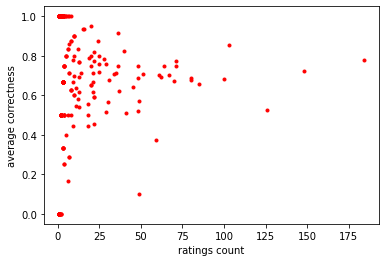

In [7]:
plot(rater_goodness['ratings_count'],
     rater_goodness['average_correctness'],
     marker='.',
     color='red',
     linestyle='None')
xlabel('ratings count')
ylabel('average correctness')

It is hard to say whether ratings count is correlated with the average correctness of each turker, if a turker has submitted any amount of ratings under 50 then their average correctness is likely in the range of 0.5 to 1.0. As the number of ratings increases, the average correctness seems to still remain in the aforementioned range so it cannot be concluded if ratings count and average correctness share any type of positive or negative relationship with one another.

In [49]:
import statsmodels.api as sm
from patsy import dmatrices
y, X=dmatrices('average_correctness~ratings_count',data= rater_goodness,return_type='dataframe')
model=sm.OLS(y, X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     average_correctness   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5488
Date:                 Tue, 02 Aug 2022   Prob (F-statistic):              0.459
Time:                         19:37:15   Log-Likelihood:                -94.663
No. Observations:                  269   AIC:                             193.3
Df Residuals:                      267   BIC:                             200.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6431      0.024     27.071      0.000       0.596       0.690
ratings_count     0.0007      0.001      0.741      0.459      -0.001       0.002
==============================================================================
Omnibus:                       29.253   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.396
Skew:                          -0.731   Prob(JB):                     6.82e-07
Kurtosis:                       2.373   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the output above, we can conclude that **there isn't a statistically significant association between average_correctness and rating counts** since the beta value is close to 0 and confidence interval includes 0

## Question 7

Step 1: Filtering for raters who have rated more than 75% of gold set URLs  <br> 
Step 2: Created a dataframe by joining label_unknown with rater goodness frame to get each turk's odds  <br> 
Step 3: Grouping by URL and category to get "Overall Odds"  <br> 



In [38]:
labels_unknown

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


In [54]:
rater_above75 = rater_goodness[rater_goodness['ratings_count'].rank(pct=True) > 0.75]
labels_unknown_merged = pd.merge(labels_unknown,rater_above75['odds'], left_on='turk', right_index = True,\
                                 how='inner')
labels_unknown_merged = labels_unknown_merged.groupby(['url', 'category']).agg (overall_odds= ('odds', 'prod'))
labels_unknown_merged = labels_unknown_merged.reset_index()
labels_unknown_merged.head()

,url,category,overall_odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,9.914590
4,http://000relationships.com,P,1.851852


## Question 8

Step 1: Grouping by URL and get the category with highest odds  <br> 


In [57]:
result_75 = labels_unknown_merged.loc[labels_unknown_merged.groupby(['url'])\
                          ['overall_odds'].idxmax()][['url', 'category', 'overall_odds']]
result_75 = result_75.set_index('url')
result_75 = result_75.rename(columns={"category": "top category", "overall_odds": "top odds"})
result_75.head()

,top category,top odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000vitamins.com,G,3.784982


## Question 9

Step 1: Repeat the steps followed in step 8 and step 9 to get result_75 <br>
Step 2: Used cross tab and normalized by row to find the category with the highest error rate <br>


In [58]:
rater_above25 = rater_goodness[rater_goodness['ratings_count'].rank(pct=True) > 0.25]
labels_unknown_merged2 = pd.merge(labels_unknown,rater_above25['odds'], left_on='turk', right_index = True,\
                                 how='inner')
labels_unknown_merged2 = labels_unknown_merged2.groupby(['url', 'category']).agg (overall_odds= ('odds', 'prod'))
labels_unknown_merged2 = labels_unknown_merged2.reset_index()
labels_unknown_merged2.head()

,url,category,overall_odds
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
2,http://000.cc,P,9.980040e-01
3,http://0000.jp,G,2.877556e+07
4,http://000relationships.com,G,0.000000e+00


In [59]:
result_25 = labels_unknown_merged2.loc[labels_unknown_merged2.groupby(['url'])\
                          ['overall_odds'].idxmax()][['url', 'category', 'overall_odds']]
result_25 = result_25.set_index(['url'])
result_25 = result_25.rename(columns={"category": "top category", "overall_odds": "top odds"})
result_25.head()

,top category,top odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00


In [60]:
result_75 = result_75.rename(columns={"top category": "top_category_75"})
result_25 = result_25.rename(columns={"top category": "top_category_25"})
pd.crosstab(result_75['top_category_75'], result_25['top_category_25'], normalize='index')

top_category_25,G,P,R,X
top_category_75,,,,
G,0.898587,0.060740,0.018880,0.021793
P,0.309278,0.573883,0.091065,0.025773
R,0.098592,0.169014,0.610329,0.122066
X,0.062271,0.016484,0.053114,0.868132


Most number of errors were found while predicting the **Category P** (it has the least accuracy)

Please note that, the errors were calcluated based on the top_category_75 values and hence the cross tab was normalized across rows rather than columns